# Sales Forecasting of Retail Clothing Product Categories 

## Business Problem

##### Forecasting the future sales for a retailer store is very important as it helps to plan accordingly on the inventory (Stock) that in-turn reduces the revenue loss

## Problem Statement

###### Our goal is to predict the Sales of different product categories of a Retail clothing store based on previous sales data and also try to minimize the revenue loss  by advising them to invest stock accordingly.

## Introduction to Dataset

#### Macro Economic data
    Data provides details on GDP value, Un-emloyement rate,Commercial Bank Interest Rate on Credit Card Plans, Cotton Monthly Price, Cotton Monthly production, Cotton Exports etc

#### Weather data
    Date provides the high, avg , low values of Temperature, Hummidity, Visibility, Sea pressure, Wind speed. Data also has precepitation values for every day and  also the weather event of every day .
    
#### Holiday data
    Data provides the list of holidays and type of holiday from the year 2009 to 2015.

#### Train data
    Sales data for different product categories from the year 2009 to 2015.

### Import necessary Libraries

### Changing directory

In [1]:
pwd

'C:\\Users\\ybst5\\Desktop\\ML project'

In [2]:
cd C:\\Users\\ybst5\\Desktop\\ML project\\Sales forecasting

C:\Users\ybst5\Desktop\ML project\Sales forecasting


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Reading the data

In [4]:
holiday=pd.read_excel('Events_HolidaysData.xlsx')
macro_ec=pd.read_excel('MacroEconomicData.xlsx')
weather=pd.ExcelFile('WeatherDataNew-1549298254132.xlsx')
train=pd.read_csv('Train.csv')

In [5]:
we_2009 = pd.read_excel(weather, sheet_name= "2009")
we_2010 = pd.read_excel(weather, sheet_name = "2010")
we_2011 = pd.read_excel(weather, sheet_name = "2011")
we_2012 = pd.read_excel(weather, sheet_name = "2012")
we_2013 = pd.read_excel(weather, sheet_name = "2013")
we_2014 = pd.read_excel(weather, sheet_name = "2014")
we_2015 = pd.read_excel(weather, sheet_name = "2015")
we_2016 = pd.read_excel(weather, sheet_name = "2016")


In [6]:
weather_full = pd.concat([we_2009,
we_2010,
we_2011,
we_2012,
we_2013,
we_2014,
we_2015,
we_2016])

### Pre-Processing weather data

#### Renaming the column names

In [7]:
weather_full.columns = ['year','month','day','temp_high','temp_avg','temp_low','dew_high','dew_avg','dew_low',
                        'humidity_high','humidity_avg','humidity_low','pressure_high','pressure_avg','pressure_low',
                         'visibility_high','visibility_avg','visibility_low','wind_low','wind_avg','wind_high',
                        'precipitation','weather_event']

#### Replacing T value in Precip col with 0.001
        'T' in precipitation means that precepetation is less that 0.001. Hence we will replace the value with 0.001

In [8]:
weather_full.precipitation.replace(['T'],[0.001],inplace=True)

#### Checking data types 

In [9]:
we_cat = ['month','weather_event']
we_num = weather_full.columns.difference(we_cat)

In [10]:
weather_full[we_cat]=weather_full[we_cat].apply(lambda x: x.astype('str'))
weather_full[we_num]=weather_full[we_num].apply(pd.to_numeric,errors='coerce')


In [11]:
weather_full.dtypes

year                 int64
month               object
day                  int64
temp_high          float64
temp_avg           float64
temp_low           float64
dew_high           float64
dew_avg            float64
dew_low            float64
humidity_high      float64
humidity_avg       float64
humidity_low       float64
pressure_high      float64
pressure_avg       float64
pressure_low       float64
visibility_high    float64
visibility_avg     float64
visibility_low     float64
wind_low           float64
wind_avg           float64
wind_high          float64
precipitation      float64
weather_event       object
dtype: object

#### Dropping Null values 
        
        We are dropping the rows with NA values as we taking the mean of every month data and converting the whole data from daily to monthly data.Replacing the value with mean is not applicable here as the data may differ depending upon the season.



In [12]:
weather_full.isnull().sum()

year                0
month               0
day                 0
temp_high           2
temp_avg            2
temp_low            2
dew_high            2
dew_avg             2
dew_low             2
humidity_high       2
humidity_avg        2
humidity_low        2
pressure_high      19
pressure_avg       19
pressure_low       19
visibility_high    28
visibility_avg     28
visibility_low     28
wind_low           20
wind_avg           20
wind_high          59
precipitation       1
weather_event       0
dtype: int64

In [13]:
weather_full.dropna(inplace=True)

In [14]:
weather_full.isnull().sum()

year               0
month              0
day                0
temp_high          0
temp_avg           0
temp_low           0
dew_high           0
dew_avg            0
dew_low            0
humidity_high      0
humidity_avg       0
humidity_low       0
pressure_high      0
pressure_avg       0
pressure_low       0
visibility_high    0
visibility_avg     0
visibility_low     0
wind_low           0
wind_avg           0
wind_high          0
precipitation      0
weather_event      0
dtype: int64

In [15]:
weather_full.head()

,year,month,day,temp_high,temp_avg,temp_low,dew_high,dew_avg,dew_low,humidity_high,...,pressure_avg,pressure_low,visibility_high,visibility_avg,visibility_low,wind_low,wind_avg,wind_high,precipitation,weather_event
0,2009,Jan,1,-3.0,-6.0,-9.0,-16.0,-17.0,-19.0,54.0,...,1023.0,1015.0,16.0,16.0,16.0,37.0,18.0,60.0,0.000,nan
1,2009,Jan,2,1.0,-2.0,-5.0,-3.0,-7.0,-17.0,78.0,...,1012.0,1007.0,16.0,13.0,2.0,27.0,10.0,48.0,0.001,Snow
2,2009,Jan,3,3.0,1.0,-2.0,-5.0,-9.0,-13.0,72.0,...,1015.0,1008.0,16.0,16.0,16.0,27.0,16.0,42.0,0.001,nan
3,2009,Jan,4,6.0,1.0,-4.0,-10.0,-12.0,-13.0,55.0,...,1017.0,1015.0,16.0,16.0,16.0,32.0,12.0,40.0,0.000,nan
4,2009,Jan,5,6.0,5.0,3.0,-1.0,-5.0,-16.0,62.0,...,1014.0,1013.0,16.0,16.0,16.0,23.0,11.0,34.0,0.001,nan


#### Dropping column weather_event and date
 As there are a lot of null values, and as our idea is to convert daily data to monthly data. weather_event and day columns are of no use

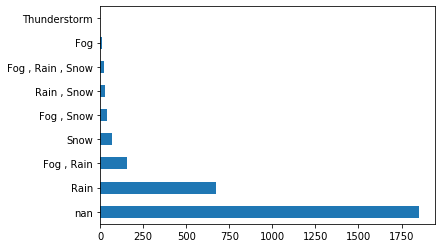

In [16]:
weather_full["weather_event"].value_counts().plot(kind='barh')

In [17]:
weather_full.drop(['weather_event','day'],axis =1,inplace=True)

In [18]:

weather_full.dtypes

year                 int64
month               object
temp_high          float64
temp_avg           float64
temp_low           float64
dew_high           float64
dew_avg            float64
dew_low            float64
humidity_high      float64
humidity_avg       float64
humidity_low       float64
pressure_high      float64
pressure_avg       float64
pressure_low       float64
visibility_high    float64
visibility_avg     float64
visibility_low     float64
wind_low           float64
wind_avg           float64
wind_high          float64
precipitation      float64
dtype: object

#### Aggregaring Daily data to Monthly data

In [19]:
temp = weather_full.groupby(['year','month']).agg('mean')

In [20]:
temp.head()

temp_high   temp_avg   temp_low   dew_high    dew_avg    dew_low  \
year month                                                                     
2009 Apr    17.100000  12.733333   7.833333   6.233333   2.533333  -1.200000   
     Aug    27.967742  24.387097  20.548387  20.451613  18.483871  16.129032   
     Dec     5.451613   2.354839  -1.032258  -0.935484  -4.677419  -8.709677   
     Feb     6.964286   2.785714  -1.642857  -2.464286  -6.392857 -10.571429   
     Jan     0.741935  -2.096774  -5.322581  -6.096774  -9.903226 -14.000000   

            humidity_high  humidity_avg  humidity_low  pressure_high  \
year month                                                             
2009 Apr        75.466667     55.700000     35.733333    1018.833333   
     Aug        88.870968     72.483871     55.677419    1018.225806   
     Dec        77.612903     61.741935     45.258065    1022.483871   
     Feb        69.535714     54.000000     38.107143    1021.714286   
     Jan        71.774194     57.354839     42.322581    1021.290323   

            pressure_avg  pressure_low  visibility_high  visibility_avg  \
year month                                                                
2009 Apr     1014.533333   1010.433333             15.9       14.066667   
     Aug     1015.967742   1013.387097             16.0       14.483871   
     Dec     1017.225806   1012.193548             16.0       13.774194   
     Feb     1017.071429   1012.464286             16.0       15.178571   
     Jan     1015.967742   1010.516129             16.0       14.000000   

            visibility_low   wind_low   wind_avg  wind_high  precipitation  
year month                                                                  
2009 Apr         10.866667  27.300000  11.366667  39.566667       3.970767  
     Aug          9.903226  19.290323   6.806452  28.064516       3.465903  
     Dec         10.677419  28.580645  13.451613  42.838710       5.956516  
     Feb         13.285714  27.928571  12.214286  41.642857       0.780429  
     Jan         11.451613  27.000000  12.000000  39.322581       2.442065

#### Writing the monthly data to a CSV file

In [21]:
temp.to_csv('weather_agg_data')

In [22]:
we_month= pd.read_csv('weather_agg_data')

In [23]:
we_month.head(30)

,year,month,temp_high,temp_avg,temp_low,dew_high,dew_avg,dew_low,humidity_high,humidity_avg,...,pressure_high,pressure_avg,pressure_low,visibility_high,visibility_avg,visibility_low,wind_low,wind_avg,wind_high,precipitation
0,2009,Apr,17.100000,12.733333,7.833333,6.233333,2.533333,-1.200000,75.466667,55.700000,...,1018.833333,1014.533333,1010.433333,15.900000,14.066667,10.866667,27.300000,11.366667,39.566667,3.970767
1,2009,Aug,27.967742,24.387097,20.548387,20.451613,18.483871,16.129032,88.870968,72.483871,...,1018.225806,1015.967742,1013.387097,16.000000,14.483871,9.903226,19.290323,6.806452,28.064516,3.465903
2,2009,Dec,5.451613,2.354839,-1.032258,-0.935484,-4.677419,-8.709677,77.612903,61.741935,...,1022.483871,1017.225806,1012.193548,16.000000,13.774194,10.677419,28.580645,13.451613,42.838710,5.956516
3,2009,Feb,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,...,1021.714286,1017.071429,1012.464286,16.000000,15.178571,13.285714,27.928571,12.214286,41.642857,0.780429
4,2009,Jan,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,...,1021.290323,1015.967742,1010.516129,16.000000,14.000000,11.451613,27.000000,12.000000,39.322581,2.442065
5,2009,Jul,26.838710,22.741935,18.225806,18.838710,16.451613,13.612903,88.612903,70.806452,...,1015.903226,1013.580645,1011.193548,16.000000,12.935484,8.451613,21.612903,7.903226,31.935484,5.825806
6,2009,Jun,23.392857,19.678571,15.678571,17.035714,15.250000,12.964286,95.428571,79.178571,...,1013.750000,1011.607143,1009.178571,15.892857,11.571429,5.500000,21.642857,7.357143,30.535714,9.107286
7,2009,Mar,9.838710,5.967742,1.774194,0.258065,-2.903226,-6.741935,74.096774,57.064516,...,1025.096774,1021.064516,1017.032258,16.000000,14.258065,10.677419,27.000000,11.387097,38.612903,1.433903
8,2009,May,20.931034,16.655172,12.206897,12.689655,9.827586,6.206897,85.827586,68.827586,...,1020.448276,1017.241379,1014.172414,15.896552,12.275862,8.965517,22.379310,8.000000,32.620690,4.527655
9,2009,Nov,13.733333,10.800000,7.566667,7.000000,4.166667,1.433333,80.466667,66.600000,...,1022.266667,1019.033333,1015.633333,16.000000,14.666667,11.833333,25.866667,11.133333,36.733333,1.363433


#### Summary Statistics of monthly weather data

In [24]:
we_month.describe()

,year,temp_high,temp_avg,temp_low,dew_high,dew_avg,dew_low,humidity_high,humidity_avg,humidity_low,pressure_high,pressure_avg,pressure_low,visibility_high,visibility_avg,visibility_low,wind_low,wind_avg,wind_high,precipitation
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,2012.500000,17.306368,13.464633,9.361412,8.448501,5.295485,1.759900,77.859206,61.416210,44.484645,1019.833691,1016.180010,1012.585498,15.897755,13.901781,10.427496,23.224176,9.142479,36.035086,3.509767
std,2.303316,9.287310,8.918475,8.622304,8.562415,9.104487,9.632818,6.451680,6.248055,6.660253,3.252805,2.721521,2.584611,0.135041,0.864952,1.595223,3.215242,2.099120,4.440581,2.146802
min,2009.000000,0.000000,-4.250000,-9.071429,-8.285714,-12.428571,-17.535714,63.032258,48.322581,28.700000,1011.785714,1007.964286,1003.785714,15.523810,11.571429,5.500000,17.645161,5.419355,28.064516,0.294935
25%,2010.750000,8.190092,5.374424,1.750288,0.427419,-2.927419,-6.758065,73.092857,57.282258,39.722312,1017.241935,1014.295285,1010.755645,15.812724,13.116786,9.314516,20.662403,7.316129,32.383333,2.246933
50%,2012.500000,17.530590,13.538932,9.244086,8.783410,5.305684,1.877957,76.716667,61.136129,44.800000,1019.750000,1016.247537,1012.633333,16.000000,14.050777,10.459677,23.000000,9.101724,35.664286,3.232645
75%,2014.250000,25.964943,21.866667,17.562931,16.874138,14.225000,11.000000,82.825000,64.904885,48.051971,1022.291667,1018.308333,1014.487903,16.000000,14.666667,11.725806,26.234447,10.761521,39.928571,4.189035
max,2016.000000,32.200000,27.533333,22.903226,21.354839,19.419355,16.774194,95.428571,79.178571,64.533333,1026.111111,1021.814815,1018.200000,16.000000,15.354839,13.433333,30.321429,13.451613,44.607143,15.527129


In [25]:
we_month.dtypes

year                 int64
month               object
temp_high          float64
temp_avg           float64
temp_low           float64
dew_high           float64
dew_avg            float64
dew_low            float64
humidity_high      float64
humidity_avg       float64
humidity_low       float64
pressure_high      float64
pressure_avg       float64
pressure_low       float64
visibility_high    float64
visibility_avg     float64
visibility_low     float64
wind_low           float64
wind_avg           float64
wind_high          float64
precipitation      float64
dtype: object

In [26]:
we_month.shape

(96, 21)

#### Change the month  from 'MMM' fomat to 'mm' format

In [27]:
we_month['month']=we_month['month'].apply(lambda x : 1 if x== 'Jan' else x)
we_month['month']=we_month['month'].apply(lambda x : 2 if x== 'Feb' else x)
we_month['month']=we_month['month'].apply(lambda x : 3 if x== 'Mar' else x)
we_month['month']=we_month['month'].apply(lambda x : 4 if x== 'Apr' else x)
we_month['month']=we_month['month'].apply(lambda x : 5 if x== 'May' else x)
we_month['month']=we_month['month'].apply(lambda x : 6 if x== 'Jun' else x)
we_month['month']=we_month['month'].apply(lambda x : 7 if x== 'Jul' else x)
we_month['month']=we_month['month'].apply(lambda x : 8 if x== 'Aug' else x)
we_month['month']=we_month['month'].apply(lambda x : 9 if x== 'Sep' else x)
we_month['month']=we_month['month'].apply(lambda x : 10 if x== 'Oct' else x)
we_month['month']=we_month['month'].apply(lambda x : 11 if x== 'Nov' else x)
we_month['month']=we_month['month'].apply(lambda x : 12 if x== 'Dec' else x)

### Ploting the correlation 

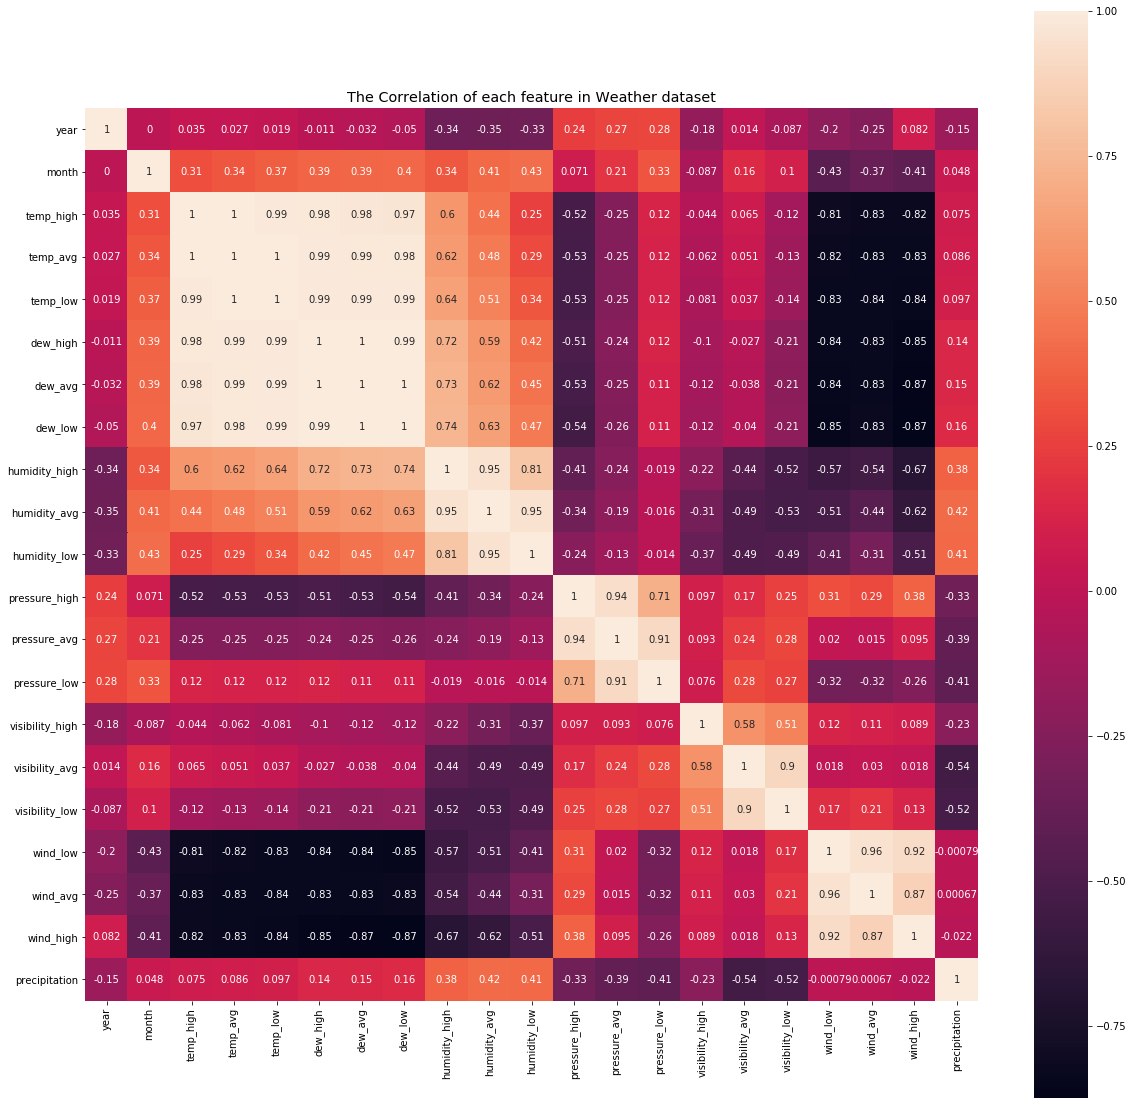

In [28]:
corplot3=we_month.corr()
%matplotlib inline 
plt.figure(figsize =(20,20)) 
sns.heatmap(data= corplot3, annot =True, square= True) 
plt.title('The Correlation of each feature in Weather dataset', fontsize= 'x-large')
plt.show()


#### Observation
    We can clearly see that columns such as Wind,Temp, Dew are highly corelated.
    Dew point temperature is defined as the temperature to which the air would have to cool (at constant pressure and constant water vapor content) in order to reach saturation.
    Wind and Temperature and not directly corelated, Change in temperature gradient results in pressure change. As wind direction is always from high-pressure to low-pressure area, Temperature indirectly plays a role in the change of Wind Speed

### Pre-Processing Macro Ecnomic data

#### Renaming the column names

In [29]:
macro_ec.columns= ['year_month','nominal_GDP','real_GDP','CPI','PIP','unemployment_rate','interest_creditcard',
                  'perdonalloan_finacerate','earnings','AdvertisingExpenses','cotton_mothly_price','change','avg_upland_planted',
                  'avg_upland_harvested','yield_per_harvested_acre','prodiction','mill_use','exports']

#### Droping columns AdvertisingExpenses and Partyinpower(PIP)
    Most of the values in AdvertisingExpenses are ?'s and column  Partyinpower(PIP) has only one value 'Democrats'

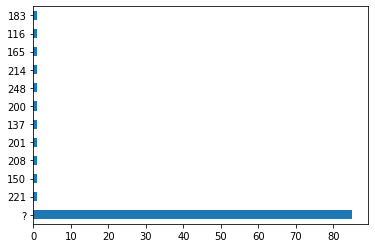

In [30]:
macro_ec["AdvertisingExpenses"].value_counts().plot(kind='barh')

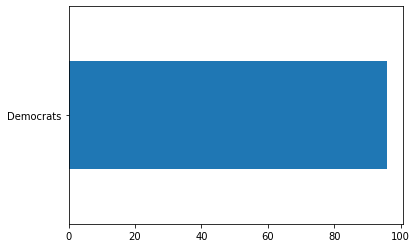

In [31]:
macro_ec["PIP"].value_counts().plot(kind='barh')

In [32]:
macro_ec.drop(['PIP','AdvertisingExpenses'],axis =1,inplace=True)

In [33]:
macro_ec.isnull().sum()

year_month                  0
nominal_GDP                 0
real_GDP                    0
CPI                         0
unemployment_rate           0
interest_creditcard         0
perdonalloan_finacerate     0
earnings                    0
cotton_mothly_price         0
change                      0
avg_upland_planted          0
avg_upland_harvested        0
yield_per_harvested_acre    0
prodiction                  0
mill_use                    0
exports                     0
dtype: int64

#### Spliting year_month column to two different column year and date

In [34]:
macro_ec[['year','month']]=macro_ec.year_month.str.split('-',expand=True,)

In [35]:
macro_ec.head()

,year_month,nominal_GDP,real_GDP,CPI,unemployment_rate,interest_creditcard,perdonalloan_finacerate,earnings,cotton_mothly_price,change,avg_upland_planted,avg_upland_harvested,yield_per_harvested_acre,prodiction,mill_use,exports,year,month
0,2009 - Jan,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2009,Jan
1,2009 - Feb,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2009,Feb
2,2009 - Mar,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,2009,Mar
3,2009 - Apr,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,2009,Apr
4,2009 - May,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,2009,May


In [36]:
macro_ec.drop(['year_month'],axis =1,inplace=True)

In [37]:
macro_ec.head()

,nominal_GDP,real_GDP,CPI,unemployment_rate,interest_creditcard,perdonalloan_finacerate,earnings,cotton_mothly_price,change,avg_upland_planted,avg_upland_harvested,yield_per_harvested_acre,prodiction,mill_use,exports,year,month
0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2009,Jan
1,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2009,Feb
2,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,2009,Mar
3,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,2009,Apr
4,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,2009,May


In [38]:
macro_ec.dtypes

nominal_GDP                 float64
real_GDP                    float64
CPI                         float64
unemployment_rate           float64
interest_creditcard         float64
perdonalloan_finacerate     float64
earnings                    float64
cotton_mothly_price         float64
change                      float64
avg_upland_planted          float64
avg_upland_harvested        float64
yield_per_harvested_acre      int64
prodiction                  float64
mill_use                    float64
exports                     float64
year                         object
month                        object
dtype: object

In [39]:
macro_ec.shape

(96, 17)

#### Summary Statistics of Ecnomic data

In [40]:
macro_ec.describe()

,nominal_GDP,real_GDP,CPI,unemployment_rate,interest_creditcard,perdonalloan_finacerate,earnings,cotton_mothly_price,change,avg_upland_planted,avg_upland_harvested,yield_per_harvested_acre,prodiction,mill_use,exports
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,16490.078125,15548.932194,252.372552,7.442708,12.519479,10.447604,23.793229,91.034479,0.615521,10.647698,8.851885,791.843750,14.616010,3.556104,11.061615
std,1427.554038,773.076316,9.290857,1.766397,0.722375,0.560651,1.147167,33.613974,6.919387,1.728418,1.102847,25.753621,2.007579,0.158263,1.710573
min,14317.372922,14345.676097,233.402000,4.600000,11.820000,9.450000,21.960000,51.500000,-23.590000,8.398000,7.345000,747.000000,11.751000,3.275000,8.500000
25%,15210.701514,14919.668252,242.474500,5.675000,11.950000,10.030000,22.797500,70.377500,-2.400000,9.296000,7.586000,772.750000,12.551000,3.410000,9.742500
50%,16422.454368,15442.996869,254.680500,7.750000,12.220000,10.470000,23.800000,83.905000,0.350000,10.260500,9.156500,790.000000,14.959000,3.572500,10.637500
75%,17772.032416,16262.237629,260.381500,9.000000,13.057500,10.940000,24.772500,93.322500,3.482500,11.412250,9.654500,807.000000,16.250000,3.675000,11.493750
max,19015.393408,16918.050624,265.421000,10.000000,14.260000,11.440000,26.040000,229.670000,22.850000,14.431000,10.577000,869.000000,18.375000,4.170000,15.280000


#### Change the month  from 'MMM' fomat to 'mm' format

In [41]:
macro_ec['month']=macro_ec['month'].apply(lambda x : 1 if x== ' Jan' else x)
macro_ec['month']=macro_ec['month'].apply(lambda x : 2 if x== ' Feb' else x)
macro_ec['month']=macro_ec['month'].apply(lambda x : 3 if x== ' Mar' else x)
macro_ec['month']=macro_ec['month'].apply(lambda x : 4 if x== ' Apr' else x)
macro_ec['month']=macro_ec['month'].apply(lambda x : 5 if x== ' May' else x)
macro_ec['month']=macro_ec['month'].apply(lambda x : 6 if x== ' Jun' else x)
macro_ec['month']=macro_ec['month'].apply(lambda x : 7 if x== ' Jul' else x)
macro_ec['month']=macro_ec['month'].apply(lambda x : 8 if x== ' Aug' else x)
macro_ec['month']=macro_ec['month'].apply(lambda x : 9 if x== ' Sep' else x)
macro_ec['month']=macro_ec['month'].apply(lambda x : 10 if x==  ' Oct' else x)
macro_ec['month']=macro_ec['month'].apply(lambda x : 11 if x== ' Nov' else x)
macro_ec['month']=macro_ec['month'].apply(lambda x : 12 if x== ' Dec' else x)

In [42]:
macro_ec['year']=macro_ec['year'].astype(('int64'))

In [43]:
macro_ec.head()

,nominal_GDP,real_GDP,CPI,unemployment_rate,interest_creditcard,perdonalloan_finacerate,earnings,cotton_mothly_price,change,avg_upland_planted,avg_upland_harvested,yield_per_harvested_acre,prodiction,mill_use,exports,year,month
0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2009,1
1,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2009,2
2,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,2009,3
3,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,2009,4
4,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,2009,5


In [44]:
macro_ec.dtypes

nominal_GDP                 float64
real_GDP                    float64
CPI                         float64
unemployment_rate           float64
interest_creditcard         float64
perdonalloan_finacerate     float64
earnings                    float64
cotton_mothly_price         float64
change                      float64
avg_upland_planted          float64
avg_upland_harvested        float64
yield_per_harvested_acre      int64
prodiction                  float64
mill_use                    float64
exports                     float64
year                          int64
month                         int64
dtype: object

In [45]:
macro_ec.shape

(96, 17)

### Corrplot for Economic data

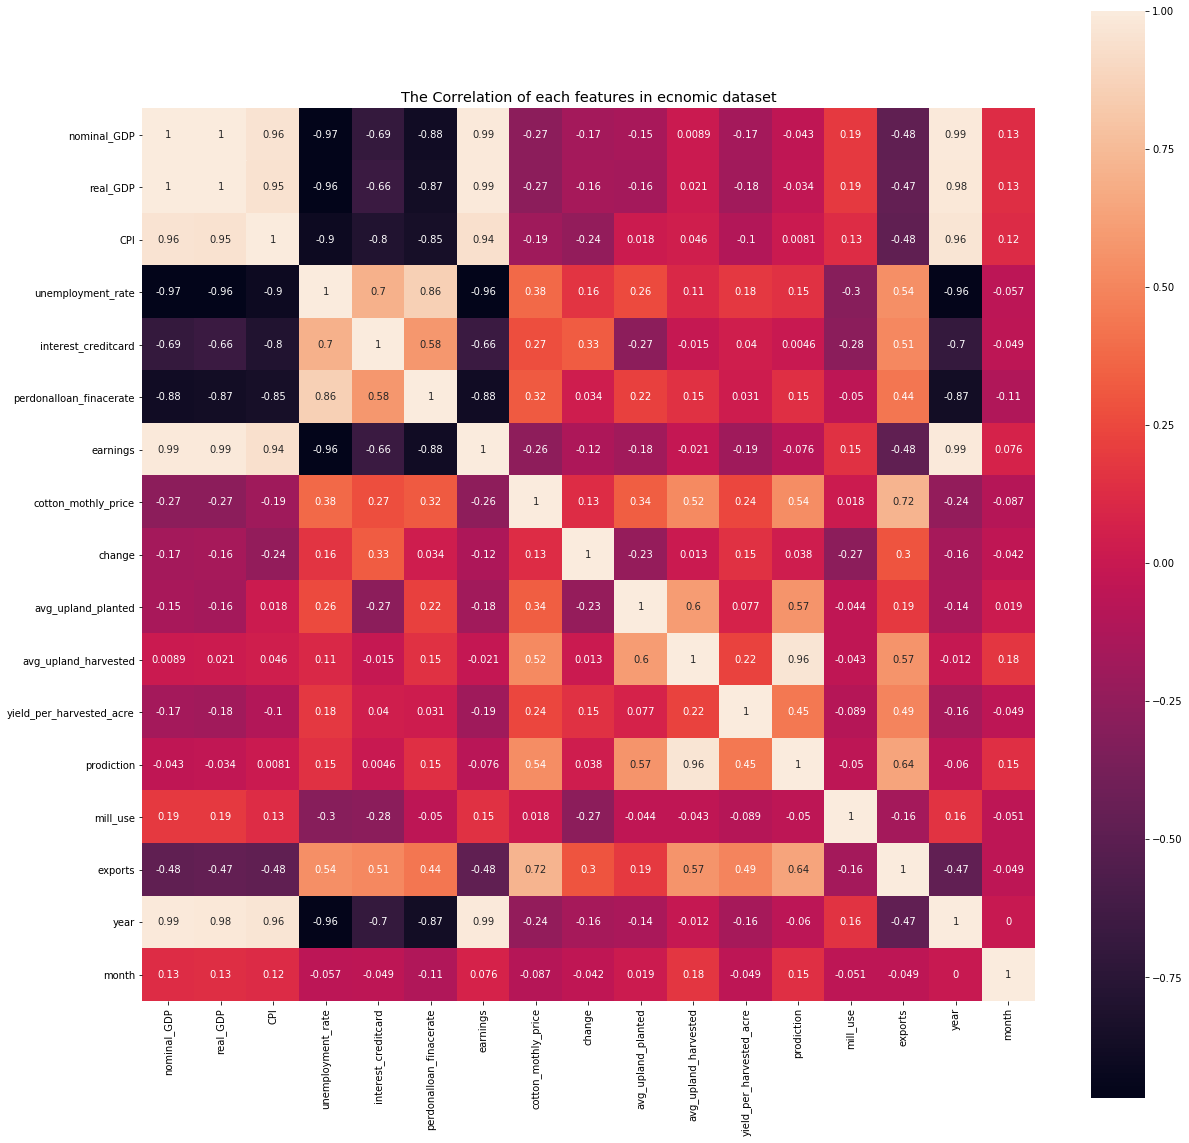

In [46]:
corplot2=macro_ec.corr()
%matplotlib inline 
plt.figure(figsize =(20,20)) 
sns.heatmap(data= corplot2, annot =True, square= True) 
plt.title('The Correlation of each features in ecnomic dataset', fontsize= 'x-large')
plt.show()

### Obervations
    nominal_GDP is highly corelated with unemployment_rate, interest_credit card
    Earnings is also highly  corelated with unemployment_rate, interest_credit card

##### Writing the data to a csv file

In [47]:
macro_ec.to_csv('ecnomic_data_final')

### Pre-Processing Holiday data

In [48]:
holiday.head()

,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event


In [49]:
holiday.isnull().sum()

Year           0
MonthDate      0
Event          0
DayCategory    0
dtype: int64

In [50]:
holiday.dtypes

Year                    int64
MonthDate      datetime64[ns]
Event                  object
DayCategory            object
dtype: object

##### Extarcting month from the Monthdate column

In [51]:
holiday['month']=holiday['MonthDate'].dt.month

In [52]:
holiday.head()

,Year,MonthDate,Event,DayCategory,month
0,2009,2001-01-01,New Year's Day,Federal Holiday,1
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday,1
2,2009,2014-02-01,Valentine's Day,Event,2
3,2009,2016-02-01,Presidents' Day,Federal Holiday,2
4,2009,2012-04-01,Easter Sunday,Event,4


### Group data with according to month and year to find the no of holidays per month

In [53]:
no_holiday=holiday.groupby(['Year','month']).count()

In [54]:
no_holiday.head()

MonthDate  Event  DayCategory
Year month                               
2009 1              2      2            2
     2              2      2            2
     4              1      1            1
     5              2      2            2
     6              1      1            1

In [55]:
## We have the no of holidays per month as events, hence droping columns MonthDate, DayCategory
no_holiday.drop(['MonthDate','DayCategory'],axis =1,inplace=True)

In [56]:
no_holiday.head()

Event
Year month       
2009 1          2
     2          2
     4          1
     5          2
     6          1

In [57]:
no_holiday.to_csv('no_of_holidays')

In [58]:
no_holiday=pd.read_csv('no_of_holidays')

In [59]:
no_holiday.head()

,Year,month,Event
0,2009,1,2
1,2009,2,2
2,2009,4,1
3,2009,5,2
4,2009,6,1


#### Renaming the column names

In [60]:
no_holiday.columns=['year','month','no_of_holidays']

In [61]:
no_holiday.dtypes

year              int64
month             int64
no_of_holidays    int64
dtype: object

In [62]:
no_holiday.shape

(81, 3)

### Pre-Processing Train data

### Converted the given table into a pivot table as we do not know the the target Variable

In [63]:
train=pd.read_csv('pivot_train.csv')

In [64]:
train.dtypes

year               int64
month              int64
MenClothing      float64
OtherClothing    float64
WomenClothing    float64
Tot.sales          int64
dtype: object

In [65]:
train.head()

,year,month,MenClothing,OtherClothing,WomenClothing,Tot.sales
0,2009,1,524.0,936.0,1755.0,3215
1,2009,2,496.0,859.0,1729.0,3084
2,2009,3,542.0,921.0,2256.0,3719
3,2009,4,669.0,914.0,2662.0,4245
4,2009,5,650.0,989.0,2732.0,4371


In [66]:
train.isnull().sum()

year             0
month            0
MenClothing      4
OtherClothing    5
WomenClothing    4
Tot.sales        0
dtype: int64

In [67]:
train=train.fillna(train.mean())

In [68]:
train.isna().sum()

year             0
month            0
MenClothing      0
OtherClothing    0
WomenClothing    0
Tot.sales        0
dtype: int64

In [69]:
train.head()

,year,month,MenClothing,OtherClothing,WomenClothing,Tot.sales
0,2009,1,524.0,936.0,1755.0,3215
1,2009,2,496.0,859.0,1729.0,3084
2,2009,3,542.0,921.0,2256.0,3719
3,2009,4,669.0,914.0,2662.0,4245
4,2009,5,650.0,989.0,2732.0,4371


### Append extra rows as we do not have data for 2016 year in train

In [70]:
train_2016=pd.DataFrame({"year":[2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
            "month":[1,2,3,4,5,6,7,8,9,10,11,12],
            "MenClothing":['','','','','','','','','','','',''],
            "OtherClothing":['','','','','','','','','','','',''],
            "WomenClothing":['','','','','','','','','','','',''],
            "Tot.sales":['','','','','','','','','','','','']})

In [71]:
train_2016.head()

,year,month,MenClothing,OtherClothing,WomenClothing,Tot.sales
0,2016,1,,,,
1,2016,2,,,,
2,2016,3,,,,
3,2016,4,,,,
4,2016,5,,,,


In [72]:
train_final=train.append(train_2016)

In [73]:
train_final.tail(20)

,year,month,MenClothing,OtherClothing,WomenClothing,Tot.sales
76,2015,5,800,1363,4413,6576
77,2015,6,716,1402,3899,6017
78,2015,7,661,1349,3817,5827
79,2015,8,712,1405,3897,6014
80,2015,9,690,1261,3881,5832
81,2015,10,800,1283,4372,6455
82,2015,11,643,1478,4401,6522
83,2015,12,967,1680,5874,8521
0,2016,1,,,,
1,2016,2,,,,


### Convert catagorical data to numnerical data

In [74]:
convert=['MenClothing','OtherClothing','WomenClothing','Tot.sales']
train_final[convert]=train_final[convert].apply(pd.to_numeric,errors='coerce')

In [75]:
train_final.dtypes

year               int64
month              int64
MenClothing      float64
OtherClothing    float64
WomenClothing    float64
Tot.sales        float64
dtype: object

## Joining the data

#### Joining monthly weather and ecnomic data using inner join

In [76]:
temp=pd.merge(we_month,macro_ec, how='inner',left_on=['year','month'],right_on=['year','month'])

In [77]:
temp.head()

,year,month,temp_high,temp_avg,temp_low,dew_high,dew_avg,dew_low,humidity_high,humidity_avg,...,perdonalloan_finacerate,earnings,cotton_mothly_price,change,avg_upland_planted,avg_upland_harvested,yield_per_harvested_acre,prodiction,mill_use,exports
0,2009,4,17.100000,12.733333,7.833333,6.233333,2.533333,-1.200000,75.466667,55.700000,...,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
1,2009,8,27.967742,24.387097,20.548387,20.451613,18.483871,16.129032,88.870968,72.483871,...,10.89,22.16,64.26,-0.83,8.905,7.619,809,12.840,3.47,9.700
2,2009,12,5.451613,2.354839,-1.032258,-0.935484,-4.677419,-8.709677,77.612903,61.741935,...,11.20,22.38,76.78,6.97,8.989,7.586,774,12.225,3.37,10.425
3,2009,2,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,...,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
4,2009,1,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,...,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550


In [78]:
temp.shape

(96, 36)

#### Joining the combined data of monthly_weather and ecnomic data with holiday data using inner join

In [79]:
we_ec_ho=pd.merge(temp,no_holiday, how='outer',left_on=['year','month'],right_on=['year','month'])

In [80]:
we_ec_ho.dtypes

year                          int64
month                         int64
temp_high                   float64
temp_avg                    float64
temp_low                    float64
dew_high                    float64
dew_avg                     float64
dew_low                     float64
humidity_high               float64
humidity_avg                float64
humidity_low                float64
pressure_high               float64
pressure_avg                float64
pressure_low                float64
visibility_high             float64
visibility_avg              float64
visibility_low              float64
wind_low                    float64
wind_avg                    float64
wind_high                   float64
precipitation               float64
nominal_GDP                 float64
real_GDP                    float64
CPI                         float64
unemployment_rate           float64
interest_creditcard         float64
perdonalloan_finacerate     float64
earnings                    

In [81]:
we_ec_ho.head()

,year,month,temp_high,temp_avg,temp_low,dew_high,dew_avg,dew_low,humidity_high,humidity_avg,...,earnings,cotton_mothly_price,change,avg_upland_planted,avg_upland_harvested,yield_per_harvested_acre,prodiction,mill_use,exports,no_of_holidays
0,2009,4,17.100000,12.733333,7.833333,6.233333,2.533333,-1.200000,75.466667,55.700000,...,22.13,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,1.0
1,2009,8,27.967742,24.387097,20.548387,20.451613,18.483871,16.129032,88.870968,72.483871,...,22.16,64.26,-0.83,8.905,7.619,809,12.840,3.47,9.700,NaN
2,2009,12,5.451613,2.354839,-1.032258,-0.935484,-4.677419,-8.709677,77.612903,61.741935,...,22.38,76.78,6.97,8.989,7.586,774,12.225,3.37,10.425,3.0
3,2009,2,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,...,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2.0
4,2009,1,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,...,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2.0


### NA values in the combined data of monthly_weather , economic, holiday data
    As there were some months where there are no holidays in hoiday data set, when an outer join is performed those missing values are taken as NA, Hence we replace there NA values with 0

In [82]:
we_ec_ho.isna().sum()

year                         0
month                        0
temp_high                    0
temp_avg                     0
temp_low                     0
dew_high                     0
dew_avg                      0
dew_low                      0
humidity_high                0
humidity_avg                 0
humidity_low                 0
pressure_high                0
pressure_avg                 0
pressure_low                 0
visibility_high              0
visibility_avg               0
visibility_low               0
wind_low                     0
wind_avg                     0
wind_high                    0
precipitation                0
nominal_GDP                  0
real_GDP                     0
CPI                          0
unemployment_rate            0
interest_creditcard          0
perdonalloan_finacerate      0
earnings                     0
cotton_mothly_price          0
change                       0
avg_upland_planted           0
avg_upland_harvested         0
yield_pe

In [83]:
we_ec_ho=we_ec_ho.fillna(0)

In [84]:
we_ec_ho.isna().sum()

year                        0
month                       0
temp_high                   0
temp_avg                    0
temp_low                    0
dew_high                    0
dew_avg                     0
dew_low                     0
humidity_high               0
humidity_avg                0
humidity_low                0
pressure_high               0
pressure_avg                0
pressure_low                0
visibility_high             0
visibility_avg              0
visibility_low              0
wind_low                    0
wind_avg                    0
wind_high                   0
precipitation               0
nominal_GDP                 0
real_GDP                    0
CPI                         0
unemployment_rate           0
interest_creditcard         0
perdonalloan_finacerate     0
earnings                    0
cotton_mothly_price         0
change                      0
avg_upland_planted          0
avg_upland_harvested        0
yield_per_harvested_acre    0
prodiction

In [85]:
we_ec_ho.shape

(96, 37)

In [86]:
we_ec_ho.tail(14)

,year,month,temp_high,temp_avg,temp_low,dew_high,dew_avg,dew_low,humidity_high,humidity_avg,...,earnings,cotton_mothly_price,change,avg_upland_planted,avg_upland_harvested,yield_per_harvested_acre,prodiction,mill_use,exports,no_of_holidays
82,2015,10,18.580645,14.483871,10.387097,8.709677,5.516129,2.322581,71.483871,57.032258,...,25.14,69.03,0.42,8.398,8.012,772,12.887,3.675,9.700,2.0
83,2015,9,28.133333,23.700000,18.966667,16.866667,14.400000,11.266667,75.066667,58.633333,...,25.05,68.74,-4.29,8.398,8.012,777,12.977,3.675,9.700,1.0
84,2016,4,16.800000,11.966667,6.833333,5.200000,0.066667,-5.533333,70.100000,49.633333,...,25.60,69.28,5.84,8.422,7.903,756,12.440,3.575,9.025,1.0
85,2016,8,30.222222,26.296296,22.222222,20.925926,18.444444,15.851852,81.814815,65.259259,...,25.52,80.26,-0.99,9.824,9.340,787,15.314,3.575,10.950,0.0
86,2016,12,6.533333,3.633333,0.433333,-0.700000,-3.933333,-8.400000,73.400000,57.766667,...,25.90,79.50,0.73,9.950,9.464,810,15.962,3.275,11.600,4.0
87,2016,2,7.103448,3.241379,-0.724138,-1.000000,-5.379310,-10.379310,70.793103,55.068966,...,25.49,66.57,-3.17,8.422,7.922,758,12.508,3.575,9.050,2.0
88,2016,1,4.766667,1.400000,-2.266667,-3.966667,-7.766667,-11.266667,64.933333,52.300000,...,25.50,68.75,-2.33,8.422,7.922,758,12.508,3.575,9.525,2.0
89,2016,7,30.129032,26.064516,21.774194,20.483871,18.161290,15.290323,82.483871,64.677419,...,25.53,81.06,9.39,9.824,9.104,802,15.215,3.575,10.950,1.0
90,2016,6,27.100000,22.433333,17.466667,15.666667,12.633333,8.866667,76.833333,58.833333,...,25.42,74.10,5.44,9.347,8.588,792,12.165,3.575,9.950,1.0
91,2016,3,14.161290,9.483871,4.645161,3.096774,-1.193548,-5.774194,71.258065,51.838710,...,25.49,65.46,-1.67,8.422,7.903,760,12.508,3.575,9.050,1.0


### Merging all the data for visualization

In [87]:
tot_data=pd.merge(we_ec_ho,train_final, how='inner',left_on=['year','month'],right_on=['year','month'])

In [88]:
tot_data.head()

,year,month,temp_high,temp_avg,temp_low,dew_high,dew_avg,dew_low,humidity_high,humidity_avg,...,avg_upland_harvested,yield_per_harvested_acre,prodiction,mill_use,exports,no_of_holidays,MenClothing,OtherClothing,WomenClothing,Tot.sales
0,2009,4,17.100000,12.733333,7.833333,6.233333,2.533333,-1.200000,75.466667,55.700000,...,7.559,787,12.400,3.62,12.225,1.0,669.0,914.0,2662.0,4245.0
1,2009,8,27.967742,24.387097,20.548387,20.451613,18.483871,16.129032,88.870968,72.483871,...,7.619,809,12.840,3.47,9.700,0.0,551.0,865.0,2371.0,3787.0
2,2009,12,5.451613,2.354839,-1.032258,-0.935484,-4.677419,-8.709677,77.612903,61.741935,...,7.586,774,12.225,3.37,10.425,3.0,930.0,1351.0,3390.0,5671.0
3,2009,2,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,...,7.559,799,12.589,3.87,11.100,2.0,496.0,859.0,1729.0,3084.0
4,2009,1,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,...,7.559,799,12.589,4.17,11.550,2.0,524.0,936.0,1755.0,3215.0


In [89]:
tot_data.tail()

,year,month,temp_high,temp_avg,temp_low,dew_high,dew_avg,dew_low,humidity_high,humidity_avg,...,avg_upland_harvested,yield_per_harvested_acre,prodiction,mill_use,exports,no_of_holidays,MenClothing,OtherClothing,WomenClothing,Tot.sales
91,2016,3,14.161290,9.483871,4.645161,3.096774,-1.193548,-5.774194,71.258065,51.838710,...,7.903,760,12.508,3.575,9.050,1.0,NaN,NaN,NaN,NaN
92,2016,5,22.120000,17.880000,13.280000,11.280000,8.760000,5.400000,78.880000,61.240000,...,7.920,755,12.455,3.575,8.500,2.0,NaN,NaN,NaN,NaN
93,2016,11,13.633333,9.866667,6.000000,4.333333,1.600000,-1.833333,73.100000,57.733333,...,9.464,791,15.600,3.475,11.425,3.0,NaN,NaN,NaN,NaN
94,2016,10,18.774194,14.967742,10.967742,11.806452,8.516129,4.935484,84.000000,67.258065,...,9.464,785,15.472,3.475,11.425,2.0,NaN,NaN,NaN,NaN
95,2016,9,26.206897,22.241379,18.172414,17.241379,14.586207,11.344828,81.965517,64.862069,...,9.464,790,15.580,3.475,10.950,1.0,NaN,NaN,NaN,NaN


In [90]:
tot_data.dtypes

year                          int64
month                         int64
temp_high                   float64
temp_avg                    float64
temp_low                    float64
dew_high                    float64
dew_avg                     float64
dew_low                     float64
humidity_high               float64
humidity_avg                float64
humidity_low                float64
pressure_high               float64
pressure_avg                float64
pressure_low                float64
visibility_high             float64
visibility_avg              float64
visibility_low              float64
wind_low                    float64
wind_avg                    float64
wind_high                   float64
precipitation               float64
nominal_GDP                 float64
real_GDP                    float64
CPI                         float64
unemployment_rate           float64
interest_creditcard         float64
perdonalloan_finacerate     float64
earnings                    

### Writing the aggregated data to a CSV file

In [91]:
tot_data.to_csv('total_aggregated_data')

#### Coorelation plot of the aggregarted data

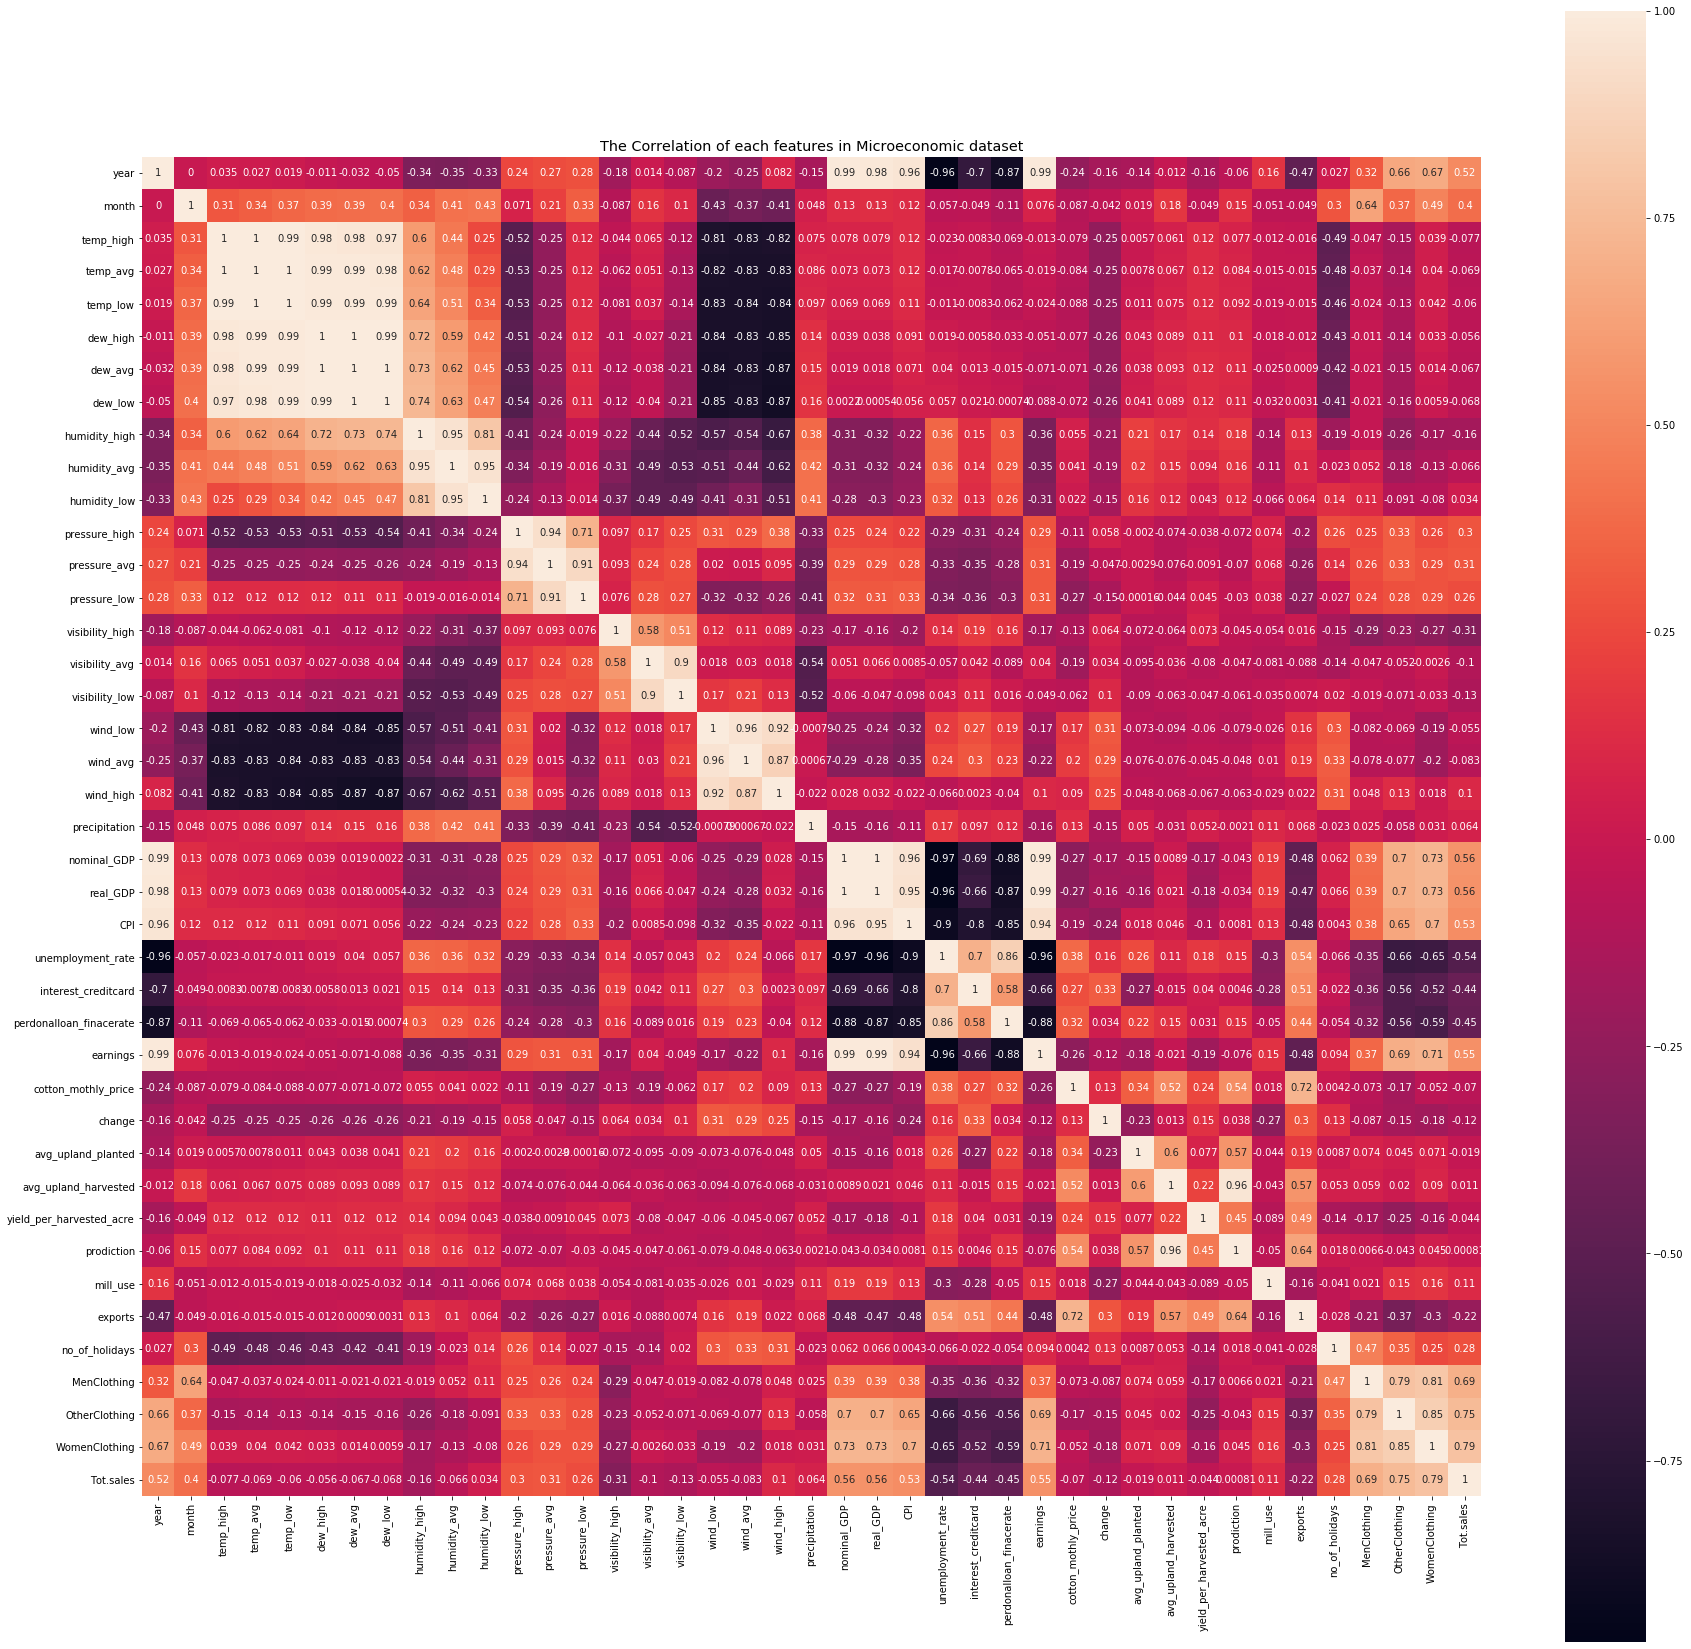

In [92]:
### Ploting the correlation 
corplot3=tot_data.corr()
%matplotlib inline 
plt.figure(figsize =(30,30)) 
sns.heatmap(data= corplot3, annot =True, square= True) 
plt.title('The Correlation of each features in Microeconomic dataset', fontsize= 'x-large')
plt.show()


### Observation
    Train data such as MenClothing, WomenClothing, OtherClothing are not showing high-corelation with the other variables

### Plotting the sales value of each category for every year

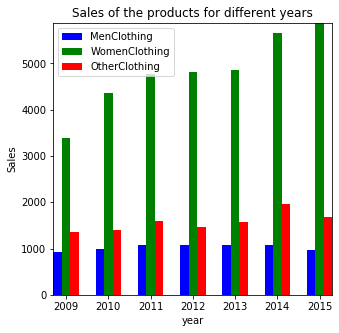

In [93]:
##Sales per year for different product catogories

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27 
y = tot_data['MenClothing']
z= tot_data['WomenClothing']
k=tot_data['OtherClothing']
b = tot_data['year']
plt.figure(figsize =(5,5))
ax = plt.subplot(111)
ax.bar(b-0.2, y,width=0.2,color='b',align='center')
ax.bar(b, z,width=0.2,color='g',align='center')
ax.bar(b+0.2, k,width=0.2,color='r',align='center')
ax.autoscale(tight=True)
ax.set_xlabel('year')
ax.set_ylabel('Sales')
ax.legend(('MenClothing','WomenClothing','OtherClothing'))
plt.title('Sales of the products for different years')
plt.show()

#### Scatter plot between cotton_mothly_price & sales
    Gives the relation with cotton_mothly_price and tot_data, 

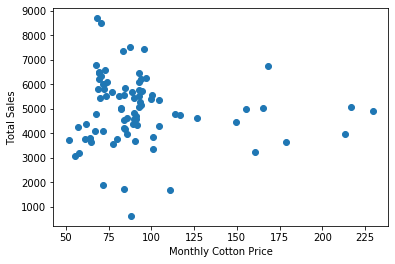

In [94]:
import matplotlib.pyplot
import pylab

x=tot_data['cotton_mothly_price']
y=tot_data['Tot.sales']

matplotlib.pyplot.scatter(x,y)
matplotlib.pyplot.figure.figsize=(5,5)
plt.xlabel('Monthly Cotton Price')
plt.ylabel('Total Sales')
matplotlib.pyplot.show()


#### Scatter plot between Read_GDP & sales
    Gives the relation with Real GDP and tot_data

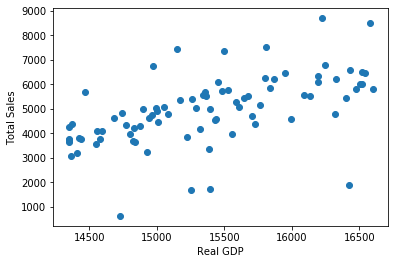

In [95]:
import matplotlib.pyplot
import pylab

x=tot_data['real_GDP']
y=tot_data['Tot.sales']

matplotlib.pyplot.scatter(x,y)
matplotlib.pyplot.figure.figsize=(5,5)
plt.xlabel('Real GDP')
plt.ylabel('Total Sales')
matplotlib.pyplot.show()

#### Scatter plot between interest_creditcard & sales
    Gives the relation with Credit card interest and tot_data

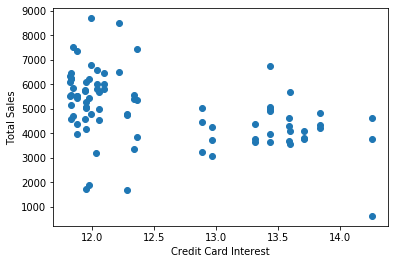

In [96]:
import matplotlib.pyplot
import pylab

x=tot_data['interest_creditcard']
y=tot_data['Tot.sales']

matplotlib.pyplot.scatter(x,y)
matplotlib.pyplot.figure.figsize=(5,5)
plt.xlabel('Credit Card Interest')
plt.ylabel('Total Sales')
matplotlib.pyplot.show()

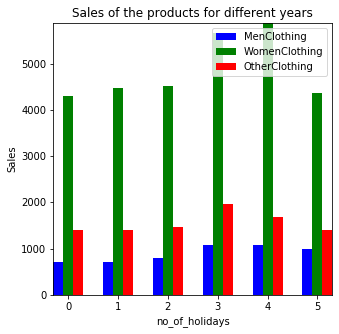

In [97]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27 
y = tot_data['MenClothing']
z= tot_data['WomenClothing']
k=tot_data['OtherClothing']
b = tot_data['no_of_holidays']
plt.figure(figsize =(5,5))
ax = plt.subplot(111)
ax.bar(b-0.2, y,width=0.2,color='b',align='center')
ax.bar(b, z,width=0.2,color='g',align='center')
ax.bar(b+0.2, k,width=0.2,color='r',align='center')
ax.autoscale(tight=True)
ax.set_xlabel('no_of_holidays')
ax.set_ylabel('Sales')
ax.legend(('MenClothing','WomenClothing','OtherClothing'))
plt.title('Sales of the products for different years')
plt.show()

## Taking WomenCatogery as Target Data

In [98]:
train2=pd.read_csv('Train.csv')

In [99]:
train2.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [100]:
train_women=train2.query('ProductCategory=="WomenClothing"')

In [101]:
train_women.columns=['year','month','product_category','sales']

In [102]:
train_women.head()

,year,month,product_category,sales
0,2009,1,WomenClothing,1755.0
3,2009,2,WomenClothing,1729.0
6,2009,3,WomenClothing,2256.0
9,2009,4,WomenClothing,2662.0
12,2009,5,WomenClothing,2732.0


In [103]:
train_women.shape

(84, 4)

In [104]:
train_women.dtypes

year                  int64
month                 int64
product_category     object
sales               float64
dtype: object

In [105]:
train_women.isna().sum()

year                0
month               0
product_category    0
sales               4
dtype: int64

In [106]:
train_women=train_women.fillna(train_women.mean())

In [107]:
train_women.isna().sum()

year                0
month               0
product_category    0
sales               0
dtype: int64

In [108]:
train_women.dtypes

year                  int64
month                 int64
product_category     object
sales               float64
dtype: object

### Understanding Distribution of Target Variable (WomenClothing)

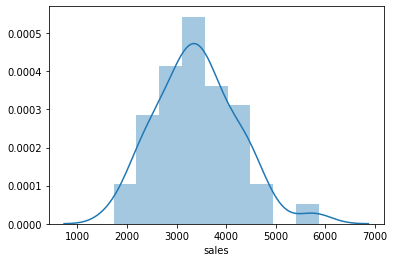

In [109]:
target_dist = train_women['sales']
sns.distplot(target_dist)

In [110]:
## Droping column ProductCategory
train_women.drop(['product_category'],axis =1,inplace=True)

In [111]:
train_women.head()

,year,month,sales
0,2009,1,1755.0
3,2009,2,1729.0
6,2009,3,2256.0
9,2009,4,2662.0
12,2009,5,2732.0


#### Taking data from 2009 to 2015 as train data
#### Taking 2016 data as test data

In [112]:
we_ec_ho_2015=we_ec_ho[:84]
test_2016=we_ec_ho[84:]

In [113]:
print(we_ec_ho_2015.shape)
print(test_2016.shape)

(84, 37)
(12, 37)


In [114]:
test_2016.tail()

,year,month,temp_high,temp_avg,temp_low,dew_high,dew_avg,dew_low,humidity_high,humidity_avg,...,earnings,cotton_mothly_price,change,avg_upland_planted,avg_upland_harvested,yield_per_harvested_acre,prodiction,mill_use,exports,no_of_holidays
91,2016,3,14.161290,9.483871,4.645161,3.096774,-1.193548,-5.774194,71.258065,51.838710,...,25.49,65.46,-1.67,8.422,7.903,760,12.508,3.575,9.050,1.0
92,2016,5,22.120000,17.880000,13.280000,11.280000,8.760000,5.400000,78.880000,61.240000,...,25.68,70.28,1.44,8.422,7.920,755,12.455,3.575,8.500,2.0
93,2016,11,13.633333,9.866667,6.000000,4.333333,1.600000,-1.833333,73.100000,57.733333,...,25.87,78.92,0.51,9.950,9.464,791,15.600,3.475,11.425,3.0
94,2016,10,18.774194,14.967742,10.967742,11.806452,8.516129,4.935484,84.000000,67.258065,...,26.04,78.52,0.85,9.950,9.464,785,15.472,3.475,11.425,2.0
95,2016,9,26.206897,22.241379,18.172414,17.241379,14.586207,11.344828,81.965517,64.862069,...,25.74,77.86,-2.99,9.950,9.464,790,15.580,3.475,10.950,1.0


##### Merging train data and the combined data of monthly_weather, economic and holiday data

In [115]:
data_train_2015=pd.merge(we_ec_ho_2015,train_women, how='inner',left_on=['year','month'],right_on=['year','month'])

In [116]:
data_train_2015.shape

(84, 38)

In [117]:
data_train_2015.head()

,year,month,temp_high,temp_avg,temp_low,dew_high,dew_avg,dew_low,humidity_high,humidity_avg,...,cotton_mothly_price,change,avg_upland_planted,avg_upland_harvested,yield_per_harvested_acre,prodiction,mill_use,exports,no_of_holidays,sales
0,2009,4,17.100000,12.733333,7.833333,6.233333,2.533333,-1.200000,75.466667,55.700000,...,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,1.0,2662.0
1,2009,8,27.967742,24.387097,20.548387,20.451613,18.483871,16.129032,88.870968,72.483871,...,64.26,-0.83,8.905,7.619,809,12.840,3.47,9.700,0.0,2371.0
2,2009,12,5.451613,2.354839,-1.032258,-0.935484,-4.677419,-8.709677,77.612903,61.741935,...,76.78,6.97,8.989,7.586,774,12.225,3.37,10.425,3.0,3390.0
3,2009,2,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,...,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2.0,1729.0
4,2009,1,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,...,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2.0,1755.0


#### Sorting the data according to year and month

In [118]:
data_train_2015=data_train_2015.sort_values(by=['year','month'])

In [119]:
test_2016=test_2016.sort_values(by=['year','month'])

### Defining MAPE & RMSE

In [120]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [121]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def root_mean_squared_error(y_true, y_pred): 
    meanSquaredError=mean_squared_error(y_true, y_pred)
    return np.sqrt(meanSquaredError)


## Preparation for Model Building

##### Droping columns year and month and as they have no use in regression

In [122]:
data_train_2015.drop(['year','month'],axis =1,inplace=True)

In [123]:
test_2016.drop(['year','month'],axis =1,inplace=True)

##### Seperating target variable

In [124]:
x=data_train_2015[data_train_2015.columns.difference(['sales'])]
y=data_train_2015['sales']

##### Spliting data into Train and Test

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=0)

In [126]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_val',x_val.shape)
print('y_val',y_val.shape)

x_train (58, 35)
y_train (58,)
x_val (26, 35)
y_val (26,)


## Model Building

#### Linear Regression

In [127]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error
lm = LinearRegression()
model = lm.fit(x_train, y_train)
val_predictions = lm.predict(x_val)
print('MAPE = ', mean_absolute_percentage_error(y_val,val_predictions))
print('RMSE = ', root_mean_squared_error(y_val,val_predictions))

MAPE =  17.809578880720238
RMSE =  761.8835821185858


In [128]:
lm.predict(test_2016)

array([-2433996.02511506, -2422719.6487008 , -2433352.1684901 ,
       -2438384.20021498, -2465485.32853387, -2460246.18162827,
       -2469361.29354467, -2508225.45938087, -2530720.09193427,
       -2532590.44017641, -2558873.32838104, -2574789.81194528])

#### Decession Tree

In [129]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import tree
dt = tree.DecisionTreeRegressor() 
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
dsearch = GridSearchCV(estimator=dt,param_grid=param_grid,cv=5)
dsearch.fit(x_train, y_train)
print(dsearch.best_estimator_)
val_predictions = dsearch.predict(x_val)
print('MAPE = ', mean_absolute_percentage_error(y_val,val_predictions))
print('RMSE = ', root_mean_squared_error(y_val,val_predictions))



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=5,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
MAPE =  15.783447546095445
RMSE =  680.677071815457


In [130]:
dsearch.predict(test_2016)

array([2650.26420455, 2650.26420455, 2650.26420455, 2650.26420455,
       2650.26420455, 2650.26420455, 2650.26420455, 2650.26420455,
       2650.26420455, 2650.26420455, 2650.26420455, 2650.26420455])

#### Random Forest

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
params = {'bootstrap': [True, False],
         'max_depth': [10, 20, 30, 40],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200, 400, 600, 800]}
rf_search=GridSearchCV(rf, param_grid=params, n_jobs=-1)
rf_search.fit(x_train , y_train)
val_predictions = rf_search.predict(x_val)
print(rf_search.best_estimator_)
print('MAPE = ', mean_absolute_percentage_error(y_val,val_predictions))
print('RMSE = ', root_mean_squared_error(y_val,val_predictions))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
MAPE =  10.613583684130628
RMSE =  470.66504759211944


In [132]:
val_pred_dt=rf_search.predict(x_val)

In [133]:
val_pred_dt

array([3203.87875   , 3496.90234375, 3355.61203125, 3539.0365625 ,
       3104.58828125, 3709.62453125, 2760.0646875 , 3799.4365625 ,
       3207.70125   , 2613.09625   , 4203.24078125, 2881.98609375,
       4052.32171875, 3962.4978125 , 2948.81890625, 3186.91015625,
       4110.708125  , 3471.29      , 3712.8740625 , 4113.51453125,
       4571.288125  , 3593.28703125, 3287.3175    , 4159.10265625,
       3641.5765625 , 3597.76515625])

#### GB Regressor

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
GBmodel = GradientBoostingRegressor()
param_dist = {"learning_rate": np.linspace(0.05, 0.15,5),
               "max_depth": range(3, 5),
               "min_samples_leaf": range(3, 5)}

gb1 = RandomizedSearchCV(GBmodel, param_dist, cv=7,n_iter=10, random_state=5)
gb1.fit(x_train , y_train)
val_predictions = gb1.predict(x_val)
print(gb1.best_estimator_)
print('MAPE = ', mean_absolute_percentage_error(y_val,val_predictions))
print('RMSE = ', root_mean_squared_error(y_val,val_predictions))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MAPE =  9.183804123858277
RMSE =  472.51748331902826


In [135]:
gb1.predict(test_2016)

array([2972.98401562, 2972.98401562, 2805.18800315, 3019.09487576,
       3194.8654627 , 3104.9501781 , 3249.84508378, 3091.82900344,
       3104.9501781 , 3194.8654627 , 3208.77422221, 2811.05000974])

## Calculating VIF

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X, thresh=400):
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [137]:
x2=calculate_vif(x, thresh=600)

Dropping pressure_avg with vif=85876601.12166062
Dropping pressure_low with vif=3120763.634689148
Dropping humidity_avg with vif=2511826.686239118
Dropping real_GDP with vif=707535.3704011375
Dropping CPI with vif=88770.42883935428
Dropping temp_avg with vif=80896.2301850204
Dropping pressure_high with vif=73375.42493954608
Dropping earnings with vif=47685.42294178802
Dropping visibility_high with vif=27027.301003685556
Dropping avg_upland_harvested with vif=13673.260543485694
Dropping dew_avg with vif=4143.472673013799
Dropping nominal_GDP with vif=3914.3921061307306
Dropping interest_creditcard with vif=2738.475174279964
Dropping perdonalloan_finacerate with vif=2292.338379139884
Dropping visibility_avg with vif=1874.573585485867
Dropping wind_low with vif=1642.4610223070313
Dropping humidity_high with vif=1623.803260581559
Dropping yield_per_harvested_acre with vif=1212.4100068152584
Dropping temp_low with vif=841.9765686329681
Dropping wind_high with vif=638.2977964610482


In [138]:
x2.columns

Index(['avg_upland_planted', 'change', 'cotton_mothly_price', 'dew_high',
       'dew_low', 'exports', 'humidity_low', 'mill_use', 'no_of_holidays',
       'precipitation', 'prodiction', 'temp_high', 'unemployment_rate',
       'visibility_low', 'wind_avg'],
      dtype='object')

In [139]:
x2.head()

,avg_upland_planted,change,cotton_mothly_price,dew_high,dew_low,exports,humidity_low,mill_use,no_of_holidays,precipitation,prodiction,temp_high,unemployment_rate,visibility_low,wind_avg
4,9.296,4.02,57.70,-6.096774,-14.000000,11.550,42.322581,4.17,2.0,2.442065,12.589,0.741935,7.8,11.451613,12.000000
3,9.296,-4.32,55.21,-2.464286,-10.571429,11.100,38.107143,3.87,2.0,0.780429,12.589,6.964286,8.3,13.285714,12.214286
7,9.296,-6.72,51.50,0.258065,-6.741935,11.650,39.548387,3.72,0.0,1.433903,12.589,9.838710,8.7,10.677419,11.387097
0,9.296,10.25,56.78,6.233333,-1.200000,12.225,35.733333,3.62,1.0,3.970767,12.400,17.100000,9.0,10.866667,11.366667
8,9.297,9.11,61.95,12.689655,6.206897,12.300,51.413793,3.52,2.0,4.527655,12.384,20.931034,9.4,8.965517,8.000000


In [140]:
test_2016_vif = test_2016[['avg_upland_planted', 'change', 'cotton_mothly_price', 'dew_high',
       'dew_low', 'exports', 'humidity_low', 'mill_use', 'no_of_holidays','prodiction',
       'precipitation',  'temp_high', 'unemployment_rate',
       'visibility_low', 'wind_avg']]

In [141]:

x2_train, x2_val, y2_train, y2_val = train_test_split(x2, y, test_size=0.3, random_state=1)
print('x2_train',x2_train.shape)
print('y2_train',y2_train.shape)
print('x2_val',x2_val.shape)
print('y2_val',y2_val.shape)

x2_train (58, 15)
y2_train (58,)
x2_val (26, 15)
y2_val (26,)


#### Linear Regression

In [142]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error
lm2 = LinearRegression()
model_LM2 = lm2.fit(x2_train, y2_train)
val_predictions = lm2.predict(x2_val)
print('MAPE = ', mean_absolute_percentage_error(y2_val,val_predictions))
print('RMSE = ', root_mean_squared_error(y2_val,val_predictions))


MAPE =  16.827758033674467
RMSE =  734.307087473163


In [143]:
model_LM2.predict(test_2016_vif)

array([6042.05918243, 5924.57622058, 5822.93075885, 6075.22926343,
       5881.86874307, 5971.47505902, 6274.0893156 , 6434.35771866,
       6913.24824346, 6870.03285724, 7124.33903192, 7373.57502232])

#### Decession Tree

In [144]:
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
dt2 = tree.DecisionTreeRegressor() 
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
dsearch_2 = GridSearchCV(estimator=dt2,param_grid=param_grid,n_jobs=-1)
dsearch_2.fit(x2_train, y2_train)
print(dsearch_2.best_estimator_)
val_predictions = dsearch_2.predict(x2_val)
print('MAPE = ', mean_absolute_percentage_error(y2_val,val_predictions))
print('RMSE = ', root_mean_squared_error(y2_val,val_predictions))



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=2,
                      max_features=None, max_leaf_nodes=5,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
MAPE =  16.230775792697667
RMSE =  818.8118489924781


In [145]:
dsearch_2.predict(test_2016_vif)

array([3890., 3890., 3890., 3890., 3890., 3890., 3890., 3890., 3890.,
       3890., 3890., 3890.])

#### Random Forest

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf2=RandomForestRegressor()
params = {'bootstrap': [True, False],
         'max_depth': [10, 20, 30, 40],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200, 400, 600, 800]}
rf_search2=RandomizedSearchCV(rf2, params, n_jobs=-1)
rf_search2.fit(x2_train , y2_train)
val_predictions = rf_search2.predict(x2_val)
print(rf_search2.best_estimator_)
print('MAPE = ', mean_absolute_percentage_error(y2_val,val_predictions))
print('RMSE = ', root_mean_squared_error(y2_val,val_predictions))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
MAPE =  13.013598616313649
RMSE =  630.3542209723407


In [147]:
rf_search2.predict(test_2016_vif)

array([4269.93759828, 4297.48476098, 4254.31753181, 4266.98638449,
       4380.15376349, 4263.45713827, 4227.21537016, 4268.57425319,
       4338.70016363, 4415.6561952 , 4299.0120196 , 4302.15006226])

#### GB Regressor

In [148]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
GBmodel2 = GradientBoostingRegressor()
param_dist = {"learning_rate": np.linspace(0.05, 0.15,5),
               "max_depth": range(3, 5),
               "min_samples_leaf": range(3, 5)}

gb2 = RandomizedSearchCV(GBmodel, param_dist, cv=7,n_iter=10, random_state=5)
gb2.fit(x2_train , y2_train)
val_predictions = gb2.predict(x2_val)
print(gb2.best_estimator_)
print('MAPE = ', mean_absolute_percentage_error(y2_val,val_predictions))
print('RMSE = ', root_mean_squared_error(y2_val,val_predictions))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MAPE =  12.16976285860969
RMSE =  556.3353023917176


In [149]:
gb2.predict(test_2016_vif)

array([4390.67500426, 4389.2295173 , 4417.93748073, 4489.41905872,
       4655.49090982, 4395.17529065, 4236.70001488, 4264.41963307,
       4374.61396953, 4493.19975749, 4658.82240754, 4769.39244794])

## Droping below columns using corelation plot

In [150]:
x.columns

Index(['CPI', 'avg_upland_harvested', 'avg_upland_planted', 'change',
       'cotton_mothly_price', 'dew_avg', 'dew_high', 'dew_low', 'earnings',
       'exports', 'humidity_avg', 'humidity_high', 'humidity_low',
       'interest_creditcard', 'mill_use', 'no_of_holidays', 'nominal_GDP',
       'perdonalloan_finacerate', 'precipitation', 'pressure_avg',
       'pressure_high', 'pressure_low', 'prodiction', 'real_GDP', 'temp_avg',
       'temp_high', 'temp_low', 'unemployment_rate', 'visibility_avg',
       'visibility_high', 'visibility_low', 'wind_avg', 'wind_high',
       'wind_low', 'yield_per_harvested_acre'],
      dtype='object')

In [151]:
x3=x[x.columns.difference(['temp_high','temp_low','dew_high','dew_low','humidity_high','humidity_low','pressure_high','pressure_low'
          ,'visibility_high','visibility_low','wind_low','wind_high','nominal_GDP'])]

In [152]:
x3.shape

(84, 22)

In [153]:
x3.columns

Index(['CPI', 'avg_upland_harvested', 'avg_upland_planted', 'change',
       'cotton_mothly_price', 'dew_avg', 'earnings', 'exports', 'humidity_avg',
       'interest_creditcard', 'mill_use', 'no_of_holidays',
       'perdonalloan_finacerate', 'precipitation', 'pressure_avg',
       'prodiction', 'real_GDP', 'temp_avg', 'unemployment_rate',
       'visibility_avg', 'wind_avg', 'yield_per_harvested_acre'],
      dtype='object')

In [154]:
x3_train, x3_val, y3_train, y3_val = train_test_split(x3, y, test_size=0.3, random_state=0)
print('x3_train',x3_train.shape)
print('y3_train',y3_train.shape)
print('x3_val',x3_val.shape)
print('y3_val',y3_val.shape)

x3_train (58, 22)
y3_train (58,)
x3_val (26, 22)
y3_val (26,)


In [155]:
test_2016_drop = test_2016[test_2016.columns.difference(['temp_high','temp_low','dew_high','dew_low','humidity_high','humidity_low','pressure_high','pressure_low'
          ,'visibility_high','visibility_low','wind_low','wind_high','nominal_GDP'])]

In [156]:
print(test_2016_drop.shape)
test_2016_drop.columns

(12, 22)


Index(['CPI', 'avg_upland_harvested', 'avg_upland_planted', 'change',
       'cotton_mothly_price', 'dew_avg', 'earnings', 'exports', 'humidity_avg',
       'interest_creditcard', 'mill_use', 'no_of_holidays',
       'perdonalloan_finacerate', 'precipitation', 'pressure_avg',
       'prodiction', 'real_GDP', 'temp_avg', 'unemployment_rate',
       'visibility_avg', 'wind_avg', 'yield_per_harvested_acre'],
      dtype='object')

#### Linear Regression

In [157]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error
lm3 = LinearRegression()
model_LM3 = lm3.fit(x3_train, y3_train)
val_predictions = lm3.predict(x3_val)
print('MAPE = ', mean_absolute_percentage_error(y3_val,val_predictions))
print('RMSE = ', root_mean_squared_error(y3_val,val_predictions))


MAPE =  16.783554851147812
RMSE =  969.1871642978949


In [158]:
model_LM3.predict(test_2016_drop)

array([3570.5181665 , 3529.84199367, 3887.1195828 , 4561.80500347,
       3912.37905331, 9153.34705389, 3665.44262497, 3865.92895243,
       4205.28998036, 4283.42433939, 4892.96186331, 4896.72050015])

#### Decession Tree

In [159]:
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
dt3 = tree.DecisionTreeRegressor() 
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
dsearch_3 = GridSearchCV(estimator=dt2,param_grid=param_grid,n_jobs=-1)
dsearch_3.fit(x3_train, y3_train)
print(dsearch_3.best_estimator_)
val_predictions = dsearch_3.predict(x3_val)
print('MAPE = ', mean_absolute_percentage_error(y3_val,val_predictions))
print('RMSE = ', root_mean_squared_error(y3_val,val_predictions))



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=5,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
MAPE =  15.783447546095445
RMSE =  680.677071815457


In [160]:
dsearch_3.predict(test_2016_drop)

array([3843.40625, 3843.40625, 3843.40625, 3843.40625, 3843.40625,
       3843.40625, 3843.40625, 3843.40625, 3843.40625, 3843.40625,
       3843.40625, 3843.40625])

#### Random Forest

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf3=RandomForestRegressor()
params = {'bootstrap': [True, False],
         'max_depth': [10, 20, 30, 40],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200, 400, 600, 800]}
rf_search3=RandomizedSearchCV(rf3, params, n_jobs=-1)
rf_search3.fit(x3_train , y3_train)
val_predictions = rf_search3.predict(x3_val)
print(rf_search3.best_estimator_)
print('MAPE = ', mean_absolute_percentage_error(y3_val,val_predictions))
print('RMSE = ', root_mean_squared_error(y3_val,val_predictions))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
MAPE =  10.530426370303868
RMSE =  479.44447198197776


In [162]:
rf_search3.predict(test_2016_drop)

array([4026.69376233, 4108.02172346, 4118.25578522, 4172.67500952,
       4140.20533611, 4109.51881692, 4116.44400106, 4091.74679693,
       4088.36153643, 4201.27428616, 4485.36717395, 4496.90062218])

#### GB Regressor

In [163]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
GBmodel3 = GradientBoostingRegressor()
param_dist = {"learning_rate": np.linspace(0.05, 0.15,5),
               "max_depth": range(3, 5),
               "min_samples_leaf": range(3, 5)}

gb3 = RandomizedSearchCV(GBmodel, param_dist, cv=7,n_iter=10, random_state=5)
gb3.fit(x3_train , y3_train)
val_predictions = gb3.predict(x3_val)
print(gb3.best_estimator_)
print('MAPE = ', mean_absolute_percentage_error(y3_val,val_predictions))
print('RMSE = ', root_mean_squared_error(y3_val,val_predictions))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.125, loss='ls',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MAPE =  7.242328330990942
RMSE =  366.9425250107156


In [164]:
preds=gb3.predict(test_2016_drop)

#### Building a model using the important features

In [165]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(x3_train, y3_train)
val_predictions = model_gbr.predict(x3_val)
print('MAPE = ', mean_absolute_percentage_error(y3_val,val_predictions))
print('RMSE = ', root_mean_squared_error(y3_val,val_predictions))

MAPE =  7.657697716542118
RMSE =  374.1394716844999


In [166]:
feature_importances = pd.DataFrame(model_gbr.feature_importances_,
                                   index = x3_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
real_GDP,0.513913
no_of_holidays,0.123442
dew_avg,0.089586
temp_avg,0.063337
earnings,0.055407
cotton_mothly_price,0.034694
unemployment_rate,0.025509
exports,0.017745
pressure_avg,0.014629
change,0.010792


In [167]:
x5=x[['real_GDP','dew_avg','no_of_holidays','temp_avg','earnings','cotton_mothly_price','unemployment_rate','CPI','exports']]

In [168]:
test_2016_I2=test_2016[['real_GDP','dew_avg','no_of_holidays','temp_avg','earnings','cotton_mothly_price','unemployment_rate','CPI','exports']]

In [169]:
x5_train, x5_val, y5_train, y5_val = train_test_split(x5, y, test_size=0.3, random_state=0)
print('x5_train',x5_train.shape)
print('y5_train',y5_train.shape)
print('x5_val',x5_val.shape)
print('y5_val',y5_val.shape)

x5_train (58, 9)
y5_train (58,)
x5_val (26, 9)
y5_val (26,)


In [170]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
GBmodel4 = GradientBoostingRegressor()
param_dist = {"learning_rate": np.linspace(0.05, 0.15,5),
               "max_depth": range(3, 5),
               "min_samples_leaf": range(3, 5)}

gb4 = RandomizedSearchCV(GBmodel4, param_dist, cv=7,n_iter=10, random_state=5)
gb4.fit(x5_train , y5_train)
val_predictions = gb4.predict(x5_val)
print(gb4.best_estimator_)
print('MAPE = ', mean_absolute_percentage_error(y5_val,val_predictions))
print('RMSE = ', root_mean_squared_error(y5_val,val_predictions))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.125, loss='ls',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MAPE =  9.578567316374832
RMSE =  430.7416954379275


#### Predicting 2016  Women sales values using above model

In [171]:
preds2=gb4.predict(test_2016_I2)

In [172]:
preds2

array([3628.70605017, 4091.3005221 , 4511.89643583, 4523.22378565,
       4471.48874081, 4260.62623466, 3832.59360632, 3840.90473814,
       4009.07106561, 4415.32420119, 4753.53513318, 4450.81086573])

### Summary

#### Feature Engineering
     Calcuated the no of holidays per month irrespective of the event type and the Holiday
  
#### Important Features that effect the Sales most
      1) Monthly Real GDP Index (inMillion$)
      2) No of Holidays
      3) Temperature Avg
      4) Exports
      5) Cotton Monthly Pricing
      6) Dew Avg
    
      
      
    

#### Model Summary
    We have considered MAPE as the error metric asit is easy to quantify error for our need, Suppose taking RMSE we can get a error of 500 and our target variable is in Thousands of Dollars. Hence it is difficult to predict the quality of predictions as the Sales differ every year
    
    Gradient Boosting Refressor has provided the least MAPE as 12.81 on test data after giving only the impotant features to the model

# Conclusion

#### We can recommend the business to stock-up for December as the sales go very in December of every year
#### We also see that there is drop of sales In Women Clothing after the month of May
#### We also see that Sales go up some times when the Real GDP goes up
#### When the Credit card interest is low Sales really improve